## plot.py from insights

In [1]:
import numpy as np

from asreviewcontrib.insights.algorithms import _erf_values
from asreviewcontrib.insights.algorithms import _recall_values
from asreviewcontrib.insights.algorithms import _wss_values
from asreviewcontrib.insights.utils import _pad_simulation_labels


def plot_recall(
    ax,
    state_obj,
    priors=False,
    x_absolute=False,
    y_absolute=False,
    show_random=True,
    show_optimal=True,
    show_legend=True,
    legend_values=None,
    legend_kwargs=None,
):
    """Plot the recall@T for all thresholds T.

    Arguments
    ---------
    state_obj: (list of) asreview.state.SQLiteState
        State object from which to get the labels for the plot, or a list of
        state objects.
    priors: bool
        Include the prior in plot or not.
    x_absolute: bool
        If True, the number of records is on the x-axis.
        If False, the fraction of the whole dataset is on the x-axis.
    y_absolute: bool
        If True, the number of included records found is on the y-axis.
        If False, the fraction of all included records found is on the y-axis.
    show_random: bool
        Show the random curve in the plot.
    show_optimal: bool
        Show the optimal recall in the plot.
    show_legend: bool
        If state_obj contains multiple states, show a legend in the plot.
    legend_values: list[str]
        List of values to show in the legend if state_obj contains multiple
        states and show_legend=True.
    legend_kwargs: dict
        Dictionary of keyword arguments that are passed to the legend. See
        https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
        for the options.
    Returns
    -------
    matplotlib.axes.Axes

    Notes
    -----
    The recall at T statistic is defined as the number of relevant records
    found after reviewing T records.
    """

    labels = _pad_simulation_labels(state_obj, priors=priors)

    return _plot_recall(
        ax,
        labels,
        x_absolute=x_absolute,
        y_absolute=y_absolute,
        show_random=show_random,
        show_optimal=show_optimal,
        show_legend=show_legend,
        legend_values=legend_values,
        legend_kwargs=legend_kwargs,
    )


def plot_wss(
    ax,
    state_obj,
    priors=False,
    x_absolute=False,
    y_absolute=False,
    show_legend=True,
    legend_values=None,
    legend_kwargs=None,
):
    """Plot the WSS@T for all thresholds T.

    Arguments
    ---------
    state_obj: (list of) asreview.state.SQLiteState
        State object from which to get the labels for the plot, or a list of
        state objects.
    priors: bool
        Include the prior in plot or not.
    x_absolute: bool
        If True, the number of included records is on the x-axis.
        If False, the fraction of the all included records is on the x-axis.
    y_absolute: bool
        If True, the number of records reviewed less is on the y-axis.
        If False, the fraction of all records reviewed less is on the y-axis.
    show_legend: bool
        If state_obj contains multiple states, show a legend in the plot.
    legend_values: list[str]
        List of values to show in the legend if state_obj contains multiple
        states and show_legend=True.
    legend_kwargs: dict
        Dictionary of keyword arguments that are passed to the legend. See
        https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
        for the options.

    Returns
    -------
    matplotlib.axes.Axes

    Notes
    -----
    The Work Saved over Sampling at T (WSS@T) statistic is defined as the number
    of records that were reviewed less to find T included records, compared to
    reviewing in random order.

    The number of included records found after reading k papers when reviewing
    in random order is defined as

        round(n_pos * k / n),

    where n_pos is the number of included records in the dataset and n is the
    total number of records in the dataset. Hence the number or records that
    need to be reviewed to find T included papers, when reviewing in random
    order, is defined as the smallest integer k_T, such that

        round(n_pos * k_T / n) = T

    i.e. it is the smallest integer such that

        n_pos * k_T / n > (T - 0.5).

    If the T'th included record in the dataset is found after reviewing r_T
    records, then we have

        WSS@T = r_T - k_T.

    Example
    -------
    [Can we include the stats_explainer picture in the docs?]
    """

    labels = _pad_simulation_labels(state_obj, priors=priors)

    return _plot_wss(
        ax,
        labels,
        x_absolute=x_absolute,
        y_absolute=y_absolute,
        show_legend=show_legend,
        legend_values=legend_values,
        legend_kwargs=legend_kwargs,
    )


def plot_erf(
    ax,
    state_obj,
    priors=False,
    x_absolute=False,
    y_absolute=False,
    show_legend=True,
    legend_values=None,
    legend_kwargs=None,
):
    """Plot the ERF@T for all thresholds T.

    Arguments
    ---------
    state_obj: (list of) asreview.state.SQLiteState
        State object from which to get the labels for the plot, or a list of
        state objects.
    priors: bool
        Include the prior in plot or not.
    x_absolute: bool
        If True, the number of records is on the x-axis.
        If False, the fraction of the whole dataset is on the x-axis.
    y_absolute: bool
        If True, the number of included records found is on the y-axis.
        If False, the fraction of all included records found is on the y-axis.
    show_legend: bool
        If state_obj contains multiple states, show a legend in the plot.
    legend_values: list[str]
        List of values to show in the legend if state_obj contains multiple
        states and show_legend=True.
    legend_kwargs: dict
        Dictionary of keyword arguments that are passed to the legend. See
        https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
        for the options.

    Returns
    -------
    matplotlib.axes.Axes

    Notes
    -----
    The Extra Records Found at T (ERF@T) statistic is defined as the number of
    extra included papers that were found more after reviewing T records,
    compared to reviewing in random order.

    The number of included records found after reading T papers when reviewing
    in random order is defined as

        round(n_pos * T / n),

    where n_pos is the number of included records in the dataset and n is the
    total number of records in the dataset. Hence if n_pos_T is the number of
    positive records found after reviewing T records, then

        ERF@T = n_pos_T - round(n_pos * T / n).

    If y_absolute=False, the ERF will be returned as a fraction of the total
    number of included records, in which case we have

        ERF@T = (n_pos_T - round(n_pos * T / n)) / n_pos.

    Example
    -------
    [Can we include the stats_explainer picture in the docs?]
    """

    labels = _pad_simulation_labels(state_obj, priors=priors)

    return _plot_erf(
        ax,
        labels,
        x_absolute=x_absolute,
        y_absolute=y_absolute,
        show_legend=show_legend,
        legend_values=legend_values,
        legend_kwargs=legend_kwargs,
    )


# Plotting using labels.
def _plot_recall(
    ax,
    labels,
    x_absolute=False,
    y_absolute=False,
    show_random=True,
    show_optimal=True,
    show_legend=True,
    legend_values=None,
    legend_kwargs=None,
):
    """Plot the recall.

    labels : list
        List containing labels, or list of lists containing labels.
    """
    if not isinstance(labels[0], list):
        labels = [labels]
        show_legend = False

    if legend_values is None:
        legend_values = [None for _ in labels]

    for i, label_set in enumerate(labels):
        ax = _add_recall_curve(ax, label_set, x_absolute, y_absolute, legend_values[i])
    ax = _add_recall_info(ax, labels, x_absolute, y_absolute)

    if show_random:
        ax = _add_random_curve(ax, labels, x_absolute, y_absolute)

    if show_optimal:
        ax = _add_optimal_recall(ax, labels, x_absolute, y_absolute)

    if show_legend:
        if legend_kwargs is None:
            ax.legend()
        else:
            ax.legend(**legend_kwargs)

    return ax


def _plot_wss(
    ax,
    labels,
    x_absolute=False,
    y_absolute=False,
    show_legend=True,
    legend_values=None,
    legend_kwargs=None,
):
    """Plot for each threshold T in [0,1] the WSS@T.

    labels : list
        List containing labels, or list of lists containing labels.
    """
    if not isinstance(labels[0], list):
        labels = [labels]
        show_legend = False

    if legend_values is None:
        legend_values = [None for _ in labels]

    for i, label_set in enumerate(labels):
        ax = _add_wss_curve(ax, label_set, x_absolute, y_absolute, legend_values[i])
    ax = _add_wss_info(ax, labels, x_absolute, y_absolute)

    if show_legend:
        if legend_kwargs is None:
            ax.legend()
        else:
            ax.legend(**legend_kwargs)

    return ax


def _plot_erf(
    ax,
    labels,
    x_absolute=False,
    y_absolute=False,
    show_legend=True,
    legend_values=None,
    legend_kwargs=None,
):
    """Plot for each threshold T in [0,1] the ERF@T.

    labels : list
        List containing labels, or list of lists containing labels.
    """
    if not isinstance(labels[0], list):
        labels = [labels]
        show_legend = False

    if legend_values is None:
        legend_values = [None for _ in labels]

    for i, label_set in enumerate(labels):
        ax = _add_erf_curve(ax, label_set, x_absolute, y_absolute, legend_values[i])
    ax = _add_erf_info(ax, labels, x_absolute, y_absolute)

    if show_legend:
        if legend_kwargs is None:
            ax.legend()
        else:
            ax.legend(**legend_kwargs)

    return ax


# Adding curves.
def _add_recall_curve(ax, labels, x_absolute, y_absolute, legend_label=None):
    """Add a recall curve to a plot.

    Parameters
    ----------
    ax : plt.axes.Axes
        Axes on which to plot the curve.
    labels : list
        List of labels.
    x_absolute: bool
        If True, the number of records is on the x-axis.
        If False, the fraction of the whole dataset is on the x-axis.
    y_absolute: bool
        If True, the number of included records found is on the y-axis.
        If False, the fraction of all included records found is on the y-axis.
    legend_label : str, optional
        Label to add to the legend for this curve, by default None

    Returns
    -------
    plt.axes.Axes
        Axes with the recall curve added.
    """
    x, y = _recall_values(labels, x_absolute=x_absolute, y_absolute=y_absolute)
    ax.step(x, y, where="post", label=legend_label)
    return ax


def _add_random_curve(ax, labels, x_absolute, y_absolute):
    """Add a random curve to a plot.

    Returns
    -------
    plt.axes.Axes
        Axes with random curve added.
    """
    if isinstance(labels[0], list):
        n_pos_docs = max(sum(label_set) for label_set in labels)
        n_docs = max(len(label_set) for label_set in labels)
    else:
        n_pos_docs = sum(labels)
        n_docs = len(labels)

    # add random line if required
    x = np.arange(1, n_docs + 1)
    recall_random = np.round(np.linspace(0, n_pos_docs, n_docs))

    if not x_absolute:
        x = x / n_docs

    if y_absolute:
        y = recall_random
    else:
        y = recall_random / n_pos_docs

    ax.step(x, y, color="black", where="post")

    return ax


def _add_optimal_recall(ax, labels, x_absolute, y_absolute):
    """Add a optimal recall to a plot using step-wise increments.

    Returns
    -------
    plt.axes.Axes
        Axes with optimal recall added.
    """
    # get total amount of positive labels
    if isinstance(labels[0], list):
        n_pos_docs = max(sum(label_set) for label_set in labels)
        n_docs = max(len(label_set) for label_set in labels)
    else:
        n_pos_docs = sum(labels)
        n_docs = len(labels)

    # Create x and y arrays for step plot
    x = (
        np.arange(0, n_pos_docs + 1)
        if x_absolute
        else np.arange(0, n_pos_docs + 1) / n_docs
    )
    y = (
        np.arange(0, n_pos_docs + 1)
        if y_absolute
        else np.arange(0, n_pos_docs + 1) / n_pos_docs
    )

    # Plot the stepwise optimal recall
    ax.step(x, y, color="grey", where="post")

    return ax


def _add_wss_curve(ax, labels, x_absolute=False, y_absolute=False, legend_label=None):
    x, y = _wss_values(labels, x_absolute=x_absolute, y_absolute=y_absolute)
    ax.step(x, y, where="post", label=legend_label)
    return ax


def _add_erf_curve(ax, labels, x_absolute=False, y_absolute=False, legend_label=None):
    x, y = _erf_values(labels, x_absolute=x_absolute, y_absolute=y_absolute)
    ax.step(x, y, where="post", label=legend_label)
    return ax


# Axes styling and info.
def _add_recall_info(ax, labels, x_absolute=False, y_absolute=False):
    """Add info and set axis for a recall plot.

    Returns
    -------
    plt.axes.Axes
        Axes with title, x-axis and y-axis set for a recall plot.
    """
    if isinstance(labels[0], list):
        n_pos_docs = max(sum(label_set) for label_set in labels)
    else:
        n_pos_docs = sum(labels)

    if y_absolute:
        y_lim = [-n_pos_docs * 0.05, n_pos_docs * 1.05]
        yticks = [int(n_pos_docs * r) for r in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
    else:
        y_lim = [-0.05, 1.05]
        yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    if x_absolute:
        xlabel = "Number of labeled records"
    else:
        xlabel = "Proportion of labeled records"

    ax.set_title("Recall")
    ax.set(xlabel=xlabel, ylabel="Recall")
    ax.set_ylim(y_lim)
    ax.set_yticks(yticks)

    if x_absolute:
        ax.xaxis.get_major_locator().set_params(integer=True)

    _fix_start_tick(ax)

    return ax


def _add_wss_info(ax, labels, x_absolute=False, y_absolute=False):
    """Add info and set axis for a WSS plot.

    Returns
    -------
    plt.axes.Axes
        Axes with title, x-axis and y-axis set for a WSS plot.
    """
    if isinstance(labels[0], list):
        n_docs = max(len(label_set) for label_set in labels)
    else:
        n_docs = len(labels)

    if y_absolute:
        y_lim = [-n_docs * 0.05, n_docs * 1.05]
        yticks = [int(n_docs * r) for r in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
    else:
        y_lim = [-0.05, 1.05]
        yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    ax.set_title("Work Saved over Sampling (WSS) given Recall")
    ax.set(xlabel="Recall", ylabel="WSS")
    ax.set_ylim(y_lim)
    ax.set_yticks(yticks)

    if x_absolute:
        ax.xaxis.get_major_locator().set_params(integer=True)

        # correct x axis if tick is at position 0
        _fix_start_tick(ax)

    return ax


def _add_erf_info(ax, labels, x_absolute=False, y_absolute=False):
    """Add info and set axis for a ERF plot.

    Returns
    -------
    plt.axes.Axes
        Axes with title, x-axis and y-axis set for a ERF plot.
    """
    if isinstance(labels[0], list):
        n_pos_docs = max(sum(label_set) for label_set in labels)
    else:
        n_pos_docs = sum(labels)

    if y_absolute:
        y_lim = [-n_pos_docs * 0.05, n_pos_docs * 1.05]
        yticks = [int(n_pos_docs * r) for r in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
    else:
        y_lim = [-0.05, 1.05]
        yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    if x_absolute:
        xlabel = "Number of labeled records"
    else:
        xlabel = "Proportion of labeled records"

    ax.set_title("Extra Relevant Records Found (ERF)")
    ax.set(xlabel=xlabel, ylabel="ERF")
    ax.set_ylim(y_lim)
    ax.set_yticks(yticks)

    if x_absolute:
        ax.xaxis.get_major_locator().set_params(integer=True)

        # correct x axis if tick is at position 0
        _fix_start_tick(ax)

    return ax


def _fix_start_tick(ax):
    # correct x axis if tick is at position 0
    locs = ax.get_xticks()
    if locs[1] == 0:
        locs[1] = 1
        ax.set_xticks(locs[1:-1])

    return ax

## UTILS

In [2]:
import numpy as np
from asreview import open_state
from asreview.state import SQLiteState


def _pad_simulation_labels(state_obj, priors=False):
    """Get the labels from state file(s).

    Parameters
    ----------
    state_obj : (list of) asreview.state.SQLiteState
        Single state object, or list of multiple state objects.
    priors : bool, optional
        Include the prior labels, by default False

    Returns
    -------
    list or list of lists
        List of labels if state_obj is a single state. List of lists of labels
        if state_obj is a list of states.
    """
    if isinstance(state_obj, SQLiteState):
        # get the number of records
        n_records = state_obj.n_records

        # get the labels
        labels = state_obj.get_labels(priors=priors).to_list()

        if not priors:
            n_used_records = n_records - state_obj.n_priors
        else:
            n_used_records = n_records

        # if less labels than records, check if all labels available
        if len(labels) < n_used_records:
            labels = labels + np.zeros(n_used_records - len(labels)).tolist()

        return labels
    else:
        return [
            _pad_simulation_labels(single_state, priors) for single_state in state_obj
        ]


def _iter_states(file_paths):
    """Get a generator of state objects from their filepaths.

    Parameters
    ----------
    file_paths : list[Path]
        List of filepaths of states.

    Yields
    ------
    asreview.state.BaseState
        State at given filepath.
    """
    for fp in file_paths:
        with open_state(fp) as s:
            yield s

## Add new function

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def plot_average_recall(
    ax,
    state_file_paths,
    priors=False,
    show_ci=True,
    ci_alpha=0.2,
    show_random=True,
    show_optimal=True,
    legend_label="Mean Recall",
    line_color="blue",
    legend_kwargs=None,
):
    """
    Plot the average recall curve across multiple state files, overlaying individual lines.

    Parameters
    ----------
    ax : plt.axes.Axes
        The matplotlib axis to plot on.
    state_file_paths : list of str
        List of state file paths to compute individual recall curves.
    priors : bool, optional
        Include the prior labels, by default False.
    show_ci : bool, optional
        If True, display the confidence interval, by default True.
    ci_alpha : float, optional
        Transparency of the confidence interval, by default 0.2.
    show_random : bool, optional
        If True, add the random recall curve, by default True.
    show_optimal : bool, optional
        If True, add the optimal recall curve, by default True.
    legend_label : str, optional
        Label for the mean recall curve in the legend, by default "Mean Recall".
    line_color : str, optional
        Color for the mean recall curve, by default "blue".
    legend_kwargs : dict, optional
        Additional arguments for the legend, by default None.

    Returns
    -------
    plt.axes.Axes
    """
    common_x = np.linspace(0, 1, num=100)
    interpolated_recalls = []

    # Generate state objects and plot individual recall curves
    for state_obj in _iter_states(state_file_paths):
        labels = _pad_simulation_labels(state_obj, priors=priors)
        x, recall = _recall_values(labels)
        
        # Interpolate recall values at common x points
        interp_func = interp1d(x, recall, kind="linear", bounds_error=False, fill_value=(0, 1))
        interpolated_recalls.append(interp_func(common_x))

        # Plot individual recall curves in gray
        ax.plot(x, recall, color="gray", alpha=0.6, linewidth=0.8, label="_nolegend_")

    # Calculate the mean and confidence intervals for recall
    interpolated_recalls = np.array(interpolated_recalls)
    mean_recall = np.mean(interpolated_recalls, axis=0)

    # Plot the mean recall curve
    ax.plot(common_x, mean_recall, label=legend_label, color=line_color, linewidth=2)

    if show_ci:
        lower_recall = np.percentile(interpolated_recalls, 5, axis=0)
        upper_recall = np.percentile(interpolated_recalls, 95, axis=0)
        ax.fill_between(common_x, lower_recall, upper_recall, color=line_color, alpha=ci_alpha)

    # Add random recall curve
    if show_random:
        ax.plot(common_x, common_x, color="black", linestyle="--", label="Random Recall")

    # Add optimal recall curve
    if show_optimal:
        ax.plot([0, 1], [0, 1], color="green", linestyle="-.", label="Optimal Recall")

    # Add legend if necessary
    if legend_kwargs is None:
        ax.legend()
    else:
        ax.legend(**legend_kwargs)

    # Set axis labels and title
    ax.set_title("Average Recall Curve with Individual Curves")
    ax.set_xlabel("Proportion of Records Reviewed")
    ax.set_ylabel("Recall")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    return ax


def _recall_values(labels):
    """
    Compute recall values.

    Parameters
    ----------
    labels : list
        List of labels indicating whether each record is relevant.

    Returns
    -------
    tuple
        x (proportion of records reviewed), recall (cumulative recall values).
    """
    n_total = len(labels)
    n_relevant = sum(labels)
    x = np.arange(1, n_total + 1) / n_total
    recall = np.cumsum(labels) / n_relevant
    return x, recall


### Add for two plots together also

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def plot_average_recall_two_groups(
    ax,
    state_file_paths_group1,
    state_file_paths_group2,
    priors=False,
    show_ci=True,
    ci_alpha=0.2,
    show_random=True,
    show_optimal=True,
    legend_labels=("Mean Recall Group 1", "Mean Recall Group 2"),
    colors=("blue", "red"),
    legend_kwargs=None,
):
    """
    Plot the average recall curve for two groups of state files, overlaying individual lines.

    Parameters
    ----------
    ax : plt.axes.Axes
        The matplotlib axis to plot on.
    state_file_paths_group1 : list of str
        List of state file paths for the first group.
    state_file_paths_group2 : list of str
        List of state file paths for the second group.
    priors : bool, optional
        Include the prior labels, by default False.
    show_ci : bool, optional
        If True, display the confidence interval, by default True.
    ci_alpha : float, optional
        Transparency of the confidence interval, by default 0.2.
    show_random : bool, optional
        If True, add the random recall curve, by default True.
    show_optimal : bool, optional
        If True, add the optimal recall curve, by default True.
    legend_labels : tuple, optional
        Labels for the mean recall curves of the two groups, by default
        ("Mean Recall Group 1", "Mean Recall Group 2").
    colors : tuple, optional
        Colors for the mean recall curves of the two groups, by default ("blue", "red").
    legend_kwargs : dict, optional
        Additional arguments for the legend, by default None.

    Returns
    -------
    plt.axes.Axes
    """
    common_x = np.linspace(0, 1, num=100)  # Define common_x here for all plots

    def _plot_group(state_file_paths, mean_color, individual_color, legend_label):
        interpolated_recalls = []

        # Generate state objects and plot individual recall curves
        for state_obj in _iter_states(state_file_paths):
            labels = _pad_simulation_labels(state_obj, priors=priors)
            x, recall = _recall_values(labels)
            
            # Interpolate recall values at common x points
            interp_func = interp1d(x, recall, kind="linear", bounds_error=False, fill_value=(0, 1))
            interpolated_recalls.append(interp_func(common_x))

            # Plot individual recall curves
            ax.plot(x, recall, color=individual_color, alpha=0.4, linewidth=0.8, label="_nolegend_")

        # Calculate the mean and confidence intervals for recall
        interpolated_recalls = np.array(interpolated_recalls)
        mean_recall = np.mean(interpolated_recalls, axis=0)

        # Plot the mean recall curve
        ax.plot(common_x, mean_recall, label=legend_label, color=mean_color, linewidth=2)

        if show_ci:
            lower_recall = np.percentile(interpolated_recalls, 5, axis=0)
            upper_recall = np.percentile(interpolated_recalls, 95, axis=0)
            ax.fill_between(common_x, lower_recall, upper_recall, color=mean_color, alpha=ci_alpha)

    # Plot group 1
    _plot_group(state_file_paths_group1, colors[0], "lightskyblue", legend_labels[0])

    # Plot group 2
    _plot_group(state_file_paths_group2, colors[1], "lightsalmon", legend_labels[1])

    # Add random recall curve
    if show_random:
        ax.plot(common_x, common_x, color="black", linestyle="--", label="Random Recall")

    # Add optimal recall curve
    if show_optimal:
        ax.plot([0, 1], [0, 1], color="green", linestyle="-.", label="Optimal Recall")

    # Add legend if necessary
    if legend_kwargs is None:
        ax.legend()
    else:
        ax.legend(**legend_kwargs)

    # Set axis labels and title
    ax.set_title("Average Recall Curve for Two Groups")
    ax.set_xlabel("Proportion of Records Reviewed")
    ax.set_ylabel("Recall")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    return ax


## Try plot

In [10]:
import glob

# Base directory to search
base_dir = "simulations/cleaned_inclusion_exclusion/"

# Pattern to match the files in the specific directory structure
state_files_without = glob.glob(
    f"{base_dir}*/output/simulation/state_files/sim_without_priors*.asreview",
    recursive=True,
)

state_files_with = glob.glob(
    f"{base_dir}*/output/simulation/state_files/sim_with_priors*.asreview",
    recursive=True,
)

# Print or use the list of files
print(state_files_without)
print(state_files_with)


['simulations/cleaned_inclusion_exclusion\\Appenzeller-Herzog_2019 IEC_clean\\output\\simulation\\state_files\\sim_without_priors.asreview', 'simulations/cleaned_inclusion_exclusion\\Bos _2018 IEC_clean\\output\\simulation\\state_files\\sim_without_priors.asreview']
['simulations/cleaned_inclusion_exclusion\\Appenzeller-Herzog_2019 IEC_clean\\output\\simulation\\state_files\\sim_with_priors.asreview', 'simulations/cleaned_inclusion_exclusion\\Bos _2018 IEC_clean\\output\\simulation\\state_files\\sim_with_priors.asreview']


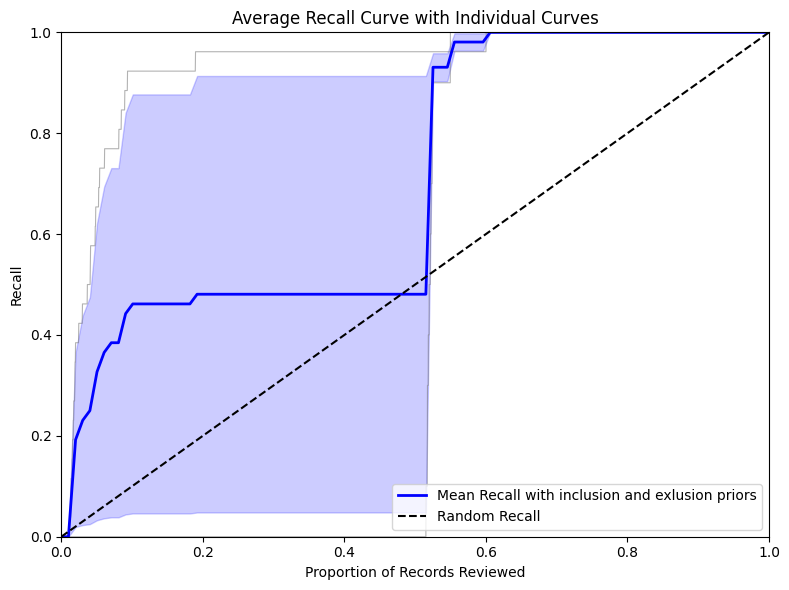

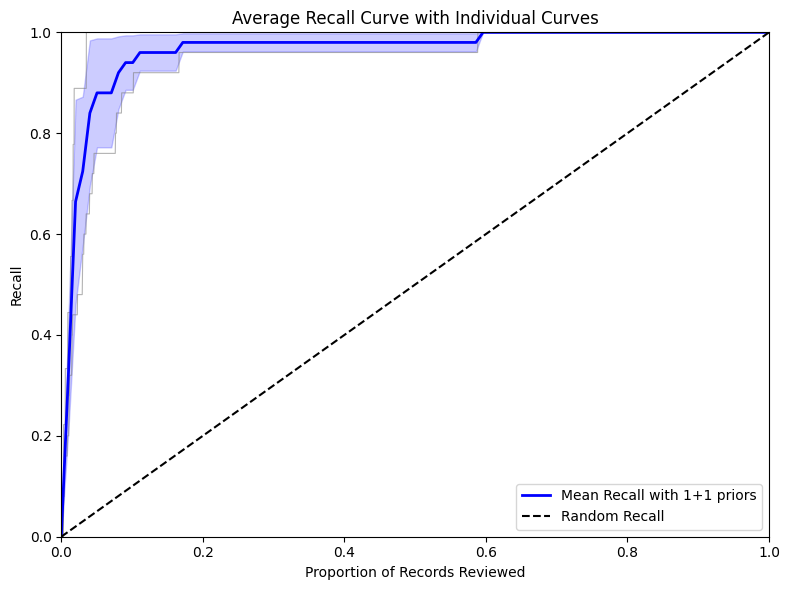

In [12]:
# Plot the average recall curve
fig, ax = plt.subplots(figsize=(8, 6))

plot_average_recall(
    ax,
    state_files_with,
    priors=False,         # Include prior labels if needed
    show_ci=True,         # Display confidence intervals
    ci_alpha=0.2,         # Transparency for CI shading
    show_random=True,     # Include random recall curve
    show_optimal=False,    # Include optimal recall curve
    legend_label="Mean Recall with inclusion and exlusion priors",
    line_color="blue",    # Color for the mean recall curve
)

plt.tight_layout()
plt.show()

# Plot the average recall curve
fig, ax = plt.subplots(figsize=(8, 6))

plot_average_recall(
    ax,
    state_files_without,
    priors=False,         # Include prior labels if needed
    show_ci=True,         # Display confidence intervals
    ci_alpha=0.2,         # Transparency for CI shading
    show_random=True,     # Include random recall curve
    show_optimal=False,    # Include optimal recall curve
    legend_label="Mean Recall with 1+1 priors",
    line_color="blue",    # Color for the mean recall curve
)

plt.tight_layout()
plt.show()



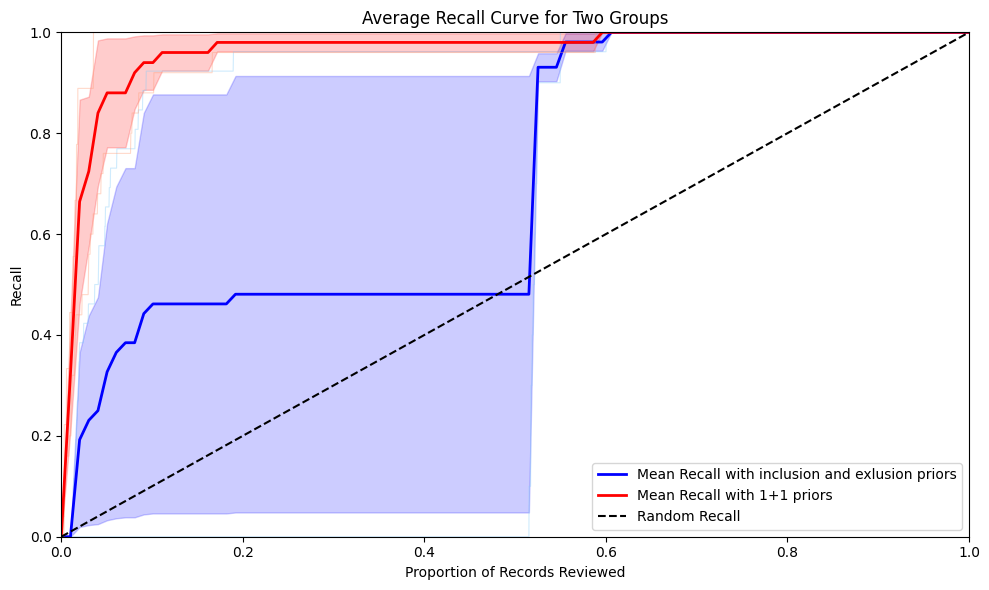

In [22]:
# Plot the average recall curves for the two groups
fig, ax = plt.subplots(figsize=(10, 6))

plot_average_recall_two_groups(
    ax,
    state_files_with,
    state_files_without,
    priors=False,
    show_ci=True,
    ci_alpha=0.2,
    show_random=True,
    show_optimal=False,
    legend_labels=("Mean Recall with inclusion and exlusion priors", 
    "Mean Recall with 1+1 priors"),
    colors=("blue", "red"),
)

plt.tight_layout()
plt.show()
